# Process of Benchmarking data

In [1]:
from functions import *
from tqdm import tqdm
import matplotlib.pyplot as plt
import os
import numpy as np
import seaborn as sns
import pandas as pd
from scipy.optimize import curve_fit

In [2]:
sns.set_theme(context='paper', font= 'Serif', style = 'ticks')

In [15]:
# target_qubits = [41,42]
target_qubits = [0]
n_qubits = len(target_qubits)

# epsilon = 0.01
machine_title = '2q-qvm'
# machine_title = 'Aspen-M-3'
# noise_model = 'depolarising_noise'
noisy_machine = machine_title

# noisy_machine = 'depolarising_noise' + '_epsilon{}'.format(epsilon)
# noise_model = 'z_noise'
path = os.path.join( os.getcwd(), 'output_storage', noisy_machine)

In [16]:
path

'C:\\Users\\mohsen\\Documents\\Python_pros\\git_controlled\\Randomized_Benchmarking_protocol\\output_storage\\2q-qvm'

In [17]:
avg_fdlty_dict = {}
err_fdlty_dict = {}
ordered_layers_dict = {}

In [18]:
def capture_bench_dataframe(path):
    dataframe = pd.read_csv(os.path.join(path, '{}.csv'.format(machine_title) ) )
    dataframe = dataframe[dataframe['target qubits'] == str(target_qubits)]
    return dataframe

def filter_large_errors(dataframe):
    return dataframe[dataframe['error of fidelity'] <= 0.05]

def capture_bench_arrays(dataframe, version_name):
    dataframe = dataframe[ dataframe['protocol name'] == version_name ]
    ordered_layers = dataframe['circuit depth']
    avg_fdlty_arr = dataframe['average of fidelity']
    err_fdlty_arr = dataframe['error of fidelity']
    return ordered_layers, avg_fdlty_arr, err_fdlty_arr

In [19]:
df = capture_bench_dataframe(path)

In [20]:
df = filter_large_errors(df)

In [21]:
bench_versions = df['protocol name'].unique()
for version in bench_versions:
    avg_fdlty_dict[version] = []
    err_fdlty_dict[version] = []
    ordered_layers_dict[version] = []

    try:
        ordered_layers, avg_fdlty_arr, err_fdlty_arr = capture_bench_arrays(df, version)
        avg_fdlty_dict[version] = avg_fdlty_arr
        err_fdlty_dict[version] = err_fdlty_arr
        ordered_layers_dict[version] = ordered_layers
    except:
        pass

In [22]:
df

,date,target qubits,number of sequences,number of shots,protocol name,circuit depth,average of fidelity,error of fidelity
0,2023-03-09,[0],200,500,standard_rb_1q,2,0.96248,0.018175
1,2023-03-09,[0],200,500,standard_rb_1q,4,0.92544,0.019432
2,2023-03-09,[0],200,500,standard_rb_1q,6,0.89368,0.022660
3,2023-03-09,[0],200,500,standard_rb_1q,8,0.85850,0.028115
4,2023-03-09,[0],200,500,standard_rb_1q,10,0.82462,0.029077
5,2023-03-09,[0],200,500,standard_rb_1q,12,0.79686,0.034201
6,2023-03-09,[0],200,500,standard_rb_1q,14,0.76352,0.034925
7,2023-03-09,[0],200,500,standard_rb_1q,16,0.73830,0.036605
8,2023-03-09,[0],200,500,standard_rb_1q,18,0.70668,0.037400
9,2023-03-09,[0],200,500,standard_rb_1q,20,0.68008,0.042598


In [23]:
err_fdlty_dict

{'standard_rb_1q': 0     0.018175
 1     0.019432
 2     0.022660
 3     0.028115
 4     0.029077
 5     0.034201
 6     0.034925
 7     0.036605
 8     0.037400
 9     0.042598
 10    0.038146
 11    0.042805
 12    0.042888
 13    0.041081
 Name: error of fidelity, dtype: float64,
 'native_conditional_single_qubit': 14    0.010254
 15    0.015639
 16    0.015707
 17    0.016756
 18    0.017594
 19    0.020021
 20    0.018641
 21    0.020394
 22    0.020836
 23    0.022452
 24    0.021753
 25    0.021412
 26    0.022057
 27    0.023106
 Name: error of fidelity, dtype: float64}

In [24]:
bench_versions

array(['standard_rb_1q', 'native_conditional_single_qubit'], dtype=object)

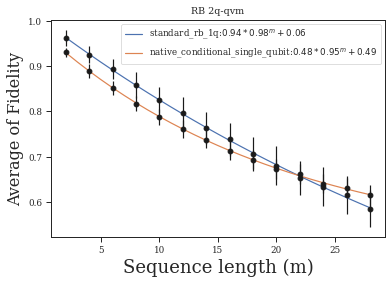

In [25]:
fig = plt.figure()
ax = fig.add_subplot()


for version in ['standard_rb_1q', 'native_conditional_single_qubit']:
# for version in ['native_conditional_conditional_two_qubits']:
# for version in ['native_conditional_single_qubit']:
#     plot_bench_arrays(ax, version, epsilon)
    plot_decay(ordered_layers_dict[version][:], avg_fdlty_dict[version][:],
               err_fdlty_dict[version][:], label = version, axes = ax)

# plt.loglog()
ax.set_xlabel('Sequence length (m)', fontsize=18)
ax.set_ylabel('Average of Fidelity', fontsize=16)
ax.set_title(r'RB {}'.format(noisy_machine))

plt.legend()

fig.savefig(os.path.join(path, 'RB_{}.png'.format(target_qubits)))
